# Цифровая обработка сигналов - 8

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Многоскоростная обработка сигналов

В предыдущих разделах мы изучили цифровые фильтры - с конечной импульсной характеристикой (КИХ) и с бесконечной импульсной характеристикой (БИХ). Многоскоростная обработка сигналов (multirate processing) предполагает, что в процессе линейного преобразования цифровых сигналов возможно изменение частоты дискретизации в сторону уменьшения или увеличения, либо в дробное число раз. Это приводит к более эффективной обработке сигналов, так как открывается возможность использования минимально допустимых частот дискретизации и, как следствие, значительного уменьшения требуемой вычислительной производительности проектируемой цифровой системы. Для преобразования частоты дискретизации в **дробное число** раз необходимо использовать каскады повышения и понижения частоты дискретизации совместно. 

Основными составными элементами системы многоскоростной ЦОС являются компрессоры и экспандеры частоты дискретизации, понижающие и соответственно повышающие частоту дискретизации преобразуемых цифровых последовательностей. При этом, если понижение частоты дискретизации в R раз (R – целое число) с помощью компрессора сводится к тому, что в выходном сигнале сохраняются только отсчеты с номерами, кратными R, то повышение частоты дискретизации в R раз с помощью экспандера предполагает размещение (R-1) нулей между каждой парой соседних отсчетов входного сигнала.

**Децимация** (прореживание) – понижение частоты дискретизации. Понижение частоты дискретизации получается путем сохранения одного отсчета входной последовательности и удалением R-1 отсчетов последовательности сигнала, что выражается следующей формулой:

$ y[n] = x[nR] $ 

Простая компрессия цифровых последовательностей приводит к наложению периодических составляющих спектра «прореженного» сигнала вследствие эффекта отражения (ухудшаются спектральные характеристики выходного сигнала). Следовательно, понижение частоты дискретизации требует подключения низкочастотного фильтра (ФНЧ). Таким образом, структурная схема фильтра дециматора получается путем каскадного соединения ФНЧ и компрессора. Тогда, формула, связывающая входной и выходной сигналы, преобразуется к виду:

$ y[n] = \sum_{k=0}{N-1}x[nR-k]\cdot h[k] $ , 

где 
- $h[k]$ - отсчёты фильтра с конечной импульсной характеристикой, 
- $x[nR-k]$ - прореженный входной сигнал,

Выходной сигнал фильтра дециматора сохраняет только каждый R-й отсчет. Следовательно, для класса фильтров с конечной импульсной характеристикой (КИХ-фильтров), когда пределы суммирования принимают конечные значения, потенциально возможно уменьшение приведенных вычислительных затрат в R раз. Это выражается в уменьшении скорости обработки или в уменьшении количества затрачиваемых логических ресурсов, если рассматривать микросхемы ПЛИС. 

**Интерполяция** – повышение частоты дискретизации. Операция увеличения частоты дискретизации задается введением R-1 нулевых отсчетов во входную последовательность и выражается формулой:
 
$
y[n] = 
 \begin{cases}
   x[n/R] , n = 0, L, 2L, ...\\
   0 , n \ne 0, L, 2L, ...
 \end{cases}
$

Поскольку размещение нулей эквивалентно сжатию в R раз и периодическому продолжению спектра входного сигнала, то при  повышении частоты дискретизации требуется также подключение ФНЧ. Таким образом, структурная схема фильтра интерполятора получается путем каскадного соединения экспандера и ФНЧ, а формула для выходного сигнала преобразуется к виду:

$ y[n] = \sum_{k=0}{N-1}x[nR-k]\cdot h[k] $ , 

где 
- $h[k]$ - отсчёты фильтра с конечной импульсной характеристикой, 
- $x[nR-k]$ - входной сигнал, со вставкой нулей между отсчётами.

Выходной сигнал фильтра-интерполятора использует «прореженную» в R раз входную последовательность. Следовательно, вычислительные затраты и память КИХ-фильтра потенциально уменьшаются в R раз.


### CIC фильтры

В предыдущем разделе рассматривался класс **однородных КИХ-фильтров**. С их помощью возможно проектировать фильтры для изменения частоты дискретизации. Для реализации этих фильтров не требуется операция умножения, следовательно фильтр работает достаточно быстро и довольно хорошо реализуется на таких устройствах, как ПЛИС.

Недостатком таких фильтров является большой уровень боковых лепестков. Боковые лепестки АЧХ подавляются путем каскадирования фильтров, при этом положение нулей не меняется, а меняется только соотношение уровней главного и бокового лепестков, относительный уровень боковых лепестков уменьшается при перемножении АЧХ.

Второй недостаток однородных фильтров – **непрямоугольная** форма АЧХ. Чтобы сделать ее более прямоугольной, используют корректирующий КИХ-фильтр, таким образом форма главного лепестка становится более прямоугольной, но увеличивается уровень боковых лепестков.

Однородные фильтры, образуя каскад интегратора и дифференцирующего звена, называются **интегрально-гребенчатыми фильтрами (CIC, Cascaded integrator–comb)**. Далее по тексту будем использовать эту терминологию.

CIC фильтр состоит из двух базовых звеньев: интегратор и гребенчатый фильтр (дифференциатор). Интегрирующее звено (int) представляет собой обычный БИХ-фильтр первого порядка, выполненный как самый простой аккумулятор. Гребенчатый фильтр (comb) является КИХ-фильтром первого порядка. 

Между интегратором и гребенчатым фильтром часто ставится узел повышения или понижения частоты дискретизации в целое число раз — $R$. 
- В случае понижения частоты дискретизации из входной последовательности выбирается каждый R-отсчет, образуя прореженную выходную последовательность.
- В случае повышения частоты дискретизации между отсчетами входной последовательности просто вставляются нули, которые затем сглаживаются в интегрирующей секции, образуя последовательность на увеличенной частоте дискретизации.

## TODO:
### TODO Формула ИХ фильтра
### TODO Формула АЧХ

#### CIC фильтр-дециматор

Если CIC-фильтр используется для понижения частоты дискретизации, то он называется дециматором. В таком случае первым звеном идет интегратор, затем происходит понижение частоты дискретизации и, наконец, идет звено дифференцирующего фильтра.

### TODO схема

#### CIC фильтр-интерполятор

### TODO схема

Если CIC-фильтр используется для повышения частоты дискретизации, то он называется интерполятором. В таком случае дифференцирующее звено стоит на первом месте, затем происходит повышение частоты дискретизации и, наконец, идет звено интегрирующего фильтра. 


Каскадное соединение интегратора и гребенчатого фильтра без операций децимации и интерполяции называется фильтром «скользящего среднего». Уровень первого бокового лепестка такого фильтра составляет всего -13 дБ, что достаточно мало для серьезных задач ЦОС.
В силу линейности математических операций, происходящих в CIC фильтре возможно каскадное соединение нескольких фильтров подряд. Это дает пропорциональное уменьшение уровня боковых лепестков, но также увеличивает завал главного лепестка спектра (под спектром я часто буду понимать АЧХ фильтра). Таким образом, при N-каскадном соединении однотипных CIC фильтров происходит перемножение идентичных передаточных характеристик. Как правило, секции интеграторов и гребенчатых фильтров объединяются вместе по типу. Например, сначала последовательно ставится N секций однотипных интеграторов, затем N секций однотипных дифференцирующих фильтров.

На следующем рисунке приведена АЧХ фильтра при различных параметрах коэффициента децимации R:

In [3]:
import numpy as np               # Import numpy 
import matplotlib.pyplot as plt  # Import matplotlib
from scipy.signal import freqz
%matplotlib inline

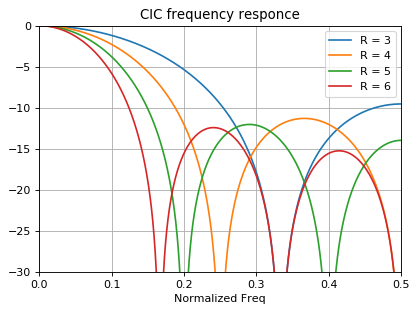

In [36]:
N = 2**15
f = np.linspace(0, 0.5, N, endpoint=True)

# Create CIC filter as recursive FIR
b = [1, 1, 1]
a = 1

# Plot results
plt.figure(figsize=(10, 4), dpi=80)
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, a, worN=N)
    h = np.abs(h)
    plt.plot(f, 20*np.log10(h/np.max(h)+10e-12), label=f'R = {len(b)}')
    plt.xlim([0, 0.5])
    plt.ylim([-30, 0])
    plt.grid(True)
    b.append(1)
plt.legend(loc='upper right')
plt.xlabel('Normalized Freq')
plt.title('CIC frequency responce')
plt.tight_layout()

### TODO

АЧХ CIC фильтра полностью эквивалентна частотной характеристике FIR фильтра с прямоугольной импульсной характеристикой (ИХ). Общая ИХ фильтра определяется как свертка всех импульсных характеристик каскадов связки интегратора и гребенчатого фильтра. С ростом порядка CIC фильтра, его ИХ интегрируется соответствующее число раз. Таким образом, для CIC фильтра первого порядка ИХ – прямоугольник, для фильтра второго порядка ИХ – равнобедренный треугольник, для третьего порядка ИХ – парабола и т.д. 


### Рост разрядности данных

К несчастью, увеличение величины задержки D в гребенчатой структуре и увеличение порядка фильтра N приводят к росту коэффициента передачи. Это в свою очередь приводит к увеличению разрядности на выходе фильтра. В задачах ЦОС, где применяются CIC фильтры нужно всегда об этом помнить и следить, чтобы передаваемые сигналы не выходили за используемую разрядную сетку. К примеру, негативный эффект роста разрядности проявляется в значительном увеличении используемых ресурсов кристалла ПЛИС.

Интерполятор: использование ограниченной точности не влияет на внутреннюю разрядность регистров, масштабируется только последний выходной каскад. Существенный рост разрядности данных происходит в секциях интеграторов.

Дециматор: CIC фильтр-дециматор очень чувствителен к параметрам D, R и N, от которых зависит разрядность промежуточных и выходных данных. И дифференцирующее звено, и интегратор влияют на конечную разрядность выходного сигнала. 

В этих формулах: B — разрядность входных данных, Bmax — разрядность выходных данных, R — коэффициент дискретизации, D — параметр задержки, N — порядок фильтра (количество каскадов).



In [18]:
class CicFilter:
    """
    Cascaded Integrator-Comb (CIC) filter is an optimized class of
    finite impulse response (FIR) filter.
    CIC filter combines an interpolator or decimator, so it has some
    parameters:

    R - decimation or interpolation ratio,
    N - number of stages in filter (or filter order)
    M - number of samples per stage (1 or 2)*

    * for this realisation of CIC filter just leave M = 1.

    CIC filter is used in multi-rate processing. In hardware
    applications CIC filter doesn't need multipliers, just only
    adders / subtractors and delay lines.

    Equation for 1st order CIC filter:
    y[n] = x[n] - x[n-RM] + y[n-1].


    Parameters
    ----------
    x : np.array
        input signal
    """

    def __init__(self, x):
        self.x = x

    def decimator(self, r, n):
        """
        CIC decimator: Integrator + Decimator + Comb

        Parameters
        ----------
        r : int
            decimation rate
        n : int
            filter order
        """

        # integrator
        y = self.x[:]
        for i in range(n):
            y = np.cumsum(y)

        # decimator

        y = y[::r]
        # comb stage
        return np.diff(y, n=n, prepend=np.zeros(n))

    def interpolator(self, r, n, mode=False):
        """
        CIC inteprolator: Comb + Decimator + Integrator

        Parameters
        ----------
        r : int
            interpolation rate
        n : int
            filter order
        mode : bool
            False - zero padding, True - value padding.
        """

        # comb stage
        y = np.diff(self.x, n=n,
                    prepend=np.zeros(n), append=np.zeros(n))

        # interpolation
        if mode:
            y = np.repeat(y, r)
        else:
            y = np.array([i if j == 0 else 0 for i in y for j in range(r)])

        # integrator
        for i in range(n):
            y = np.cumsum(y)

        if mode:
            return y[1:1 - n * r]
        else:
            return y[r - 1:-n * r + r - 1]

Decimation test

In [ ]:
def plot_filter(r=None, n=None, samples=100, mode=None):
    # Create signal
    tt = np.linspace(0, 1, samples)
    
    np.random.seed(1)
    if mode == 'Decimator':
        x = 1.5 * np.sin(4 * np.pi * tt) + 1.7 * np.sin(8.3 * np.pi * tt)
        x += 0.9*np.random.randn(samples)
    if mode == 'Interpolator':
        x = np.sin(1.7 * np.pi * tt) + 1.7 * np.sin(5.3 * np.pi * tt)
        x += 0.3*np.random.randn(samples)
    
    # Apply filter
    clf = CicFilter(x)
    
    if mode == 'Decimator':
        zz = [clf.decimator(i, j) for i, j in zip(r, n)]
    if mode == 'Interpolator':
        zz = [clf.interpolator(i, j, mode=True) for i, j in zip(r, n)]

    # Plot figure
    plt.figure(figsize=(12, 8), dpi=80)
    # plt.title(mode)
    plt.subplot(4, 2, 1)
    plt.title('Change N:')
    plt.plot(x, '-', color='C0', label='Signal')
    plt.xlim([0, samples-1])
    plt.legend(loc='upper right')
    plt.grid(True)

    for j in range(len(r)):
        plt.subplot(4, 2, 2+j)
        if j == 0:
            plt.title('Change R:')
        plt.stem(zz[j],
                 use_line_collection=True,
                 linefmt='C2',
                 basefmt='C0',
                 label=f'R = {r[j]}, N = {n[j]}'
                 )
        plt.grid(True)
        plt.legend(loc='upper right')
    plt.tight_layout(True)


In [ ]:
# Number os samples
N = 500

# Filter parameters (length of lists should be same):
flt_r = [3, 6, 4, 6, 8, 6, 15]
flt_n = [4, 1, 4, 2, 4, 8, 4]

plot_filter(r=flt_r, n=flt_n, samples=N, mode='Decimator')

In [ ]:
# Number os samples
N = 30

# Filter parameters (length of lists should be same):
flt_r = [2, 3, 3, 3, 5, 3, 7]
flt_n = [3, 1, 3, 2, 3, 6, 3]

plot_filter(r=flt_r, n=flt_n, samples=N, mode='Interpolator')